# Scramble an image for Amy

Turns out there are many ways to 'scramble an image':

https://stackoverflow.com/questions/14593441/how-to-reorder-pixels 

https://codegolf.stackexchange.com/questions/35005/rearrange-pixels-in-image-so-it-cant-be-recognized-and-then-get-it-back

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import random
%matplotlib inline

In [18]:
img = Image.open('image.png')
print(img.mode, img.size) #RGBA

RGBA (405, 392)


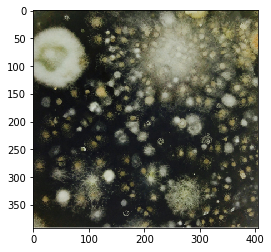

In [19]:
plt.imshow(img)

In [23]:
# borrowed from: https://stackoverflow.com/questions/14593441/how-to-reorder-pixels 
BLOCKLEN = 1 

width, height = img.size

xblock = int(width / BLOCKLEN)
yblock = int(height / BLOCKLEN)
blockmap = [(xb*BLOCKLEN, yb*BLOCKLEN, (xb+1)*BLOCKLEN, (yb+1)*BLOCKLEN)
        for xb in range(xblock) for yb in range(yblock)]

shuffle = list(blockmap)
random.shuffle(shuffle)

result = Image.new(img.mode, (width, height))
for box, sbox in zip(blockmap, shuffle):
    c = img.crop(sbox)
    result.paste(c, box)

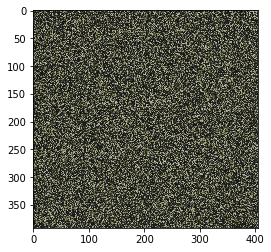

In [24]:
# plot the scrambled version
plt.imshow(result)

In [25]:
# Save it
mpimg.imsave("scrambled.png", result)

In [29]:
# Verify saved as RGBA
img = Image.open('scrambled.png')
print(img.mode, img.size) #RGBA

RGBA (405, 392)
